In [28]:
import networkx as nx
import warnings
from src.rolx import RecursiveFeatureExtractor, RoleExtractor
import matplotlib.pyplot as plt
import seaborn as sns
from pyvis.network import Network
import matplotlib.colors as mcolors

In [1]:
import torch_geometric

In [18]:
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()
print(f'\nFeatures extracted from {feature_extractor.generation_count} recursive generations:')
print(features)


Features extracted from 2 recursive generations:
    degree(mean)  degree(sum)  external_edges(mean)  internal_edges(mean)  \
0      13.125000        210.0             66.750000             27.187500   
1      16.222222        146.0             75.000000             38.888889   
2      19.600000        196.0             75.000000             44.200000   
3      23.000000        138.0             67.333333             53.166667   
4      21.000000         63.0             43.666667             46.000000   
5      17.250000         69.0             35.500000             37.250000   
6      17.500000         70.0             35.750000             37.000000   
7      30.500000        122.0             58.500000             72.250000   
8      34.400000        172.0             72.200000             73.200000   
9      40.500000         81.0             73.000000             81.500000   
10     21.333333         64.0             44.000000             45.666667   
11     42.000000         4

In [50]:
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles
print('\nNode role assignments:')
print(node_roles)
print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(4))


Node role assignments:
{0: 'role_1', 1: 'role_1', 2: 'role_1', 3: 'role_1', 4: 'role_0', 5: 'role_1', 6: 'role_1', 7: 'role_4', 8: 'role_2', 9: 'role_0', 10: 'role_0', 11: 'role_3', 12: 'role_3', 13: 'role_2', 14: 'role_3', 15: 'role_3', 16: 'role_5', 17: 'role_3', 18: 'role_3', 19: 'role_2', 20: 'role_3', 21: 'role_3', 22: 'role_3', 23: 'role_1', 24: 'role_4', 25: 'role_4', 26: 'role_0', 27: 'role_2', 28: 'role_4', 29: 'role_4', 30: 'role_2', 31: 'role_2', 32: 'role_1', 33: 'role_1'}

Node role membership by percentage:
    role_0  role_1  role_2  role_3  role_4  role_5
0   0.0121  0.6822  0.0121  0.1100  0.1717  0.0121
1   0.0119  0.4399  0.0119  0.1089  0.2573  0.1700
2   0.0473  0.3903  0.3903  0.0106  0.0106  0.1509
3   0.0135  0.3649  0.0135  0.1928  0.2918  0.1235
4   0.2008  0.2008  0.0983  0.2008  0.0983  0.2008
5   0.2342  0.3656  0.0257  0.2342  0.0257  0.1147
6   0.2342  0.3656  0.0257  0.2342  0.0257  0.1147
7   0.0132  0.0132  0.0132  0.3551  0.4853  0.1201
8   0.0415  0

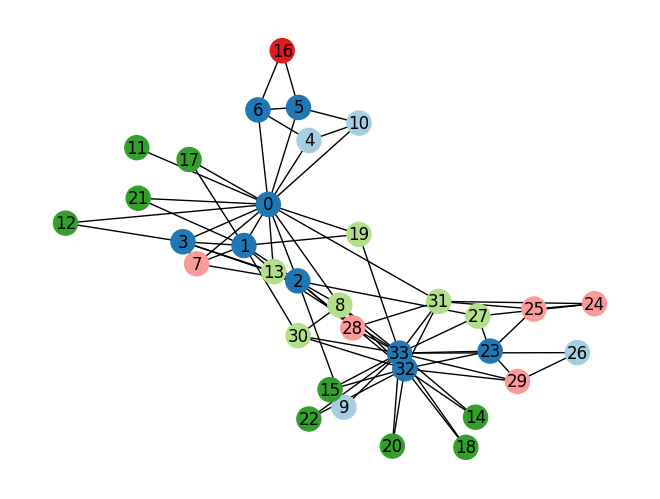

In [21]:
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
node_colors = [role_colors[node_roles[node]] for node in G.nodes]
plt.figure()

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw(
        G,
        pos=nx.spring_layout(G, seed=42),
        with_labels=True,
        node_color=node_colors,
    )

plt.show()

In [36]:
def generate_role_graph(roles_dic:dict,with_prop:None):
    graph_roles = nx.Graph()
    for key in roles_dic.keys():
        graph_roles.add_node(key)
    values_to_keys = {}
    for key, value in roles_dic.items():
        if value not in values_to_keys:
            values_to_keys[value] = []
        values_to_keys[value].append(key)

    for nodes in values_to_keys.values():
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                graph_roles.add_edge(nodes[i], nodes[j])
    return graph_roles

In [42]:
G_role = generate_role_graph(node_roles)
print(G_role.number_of_nodes())
print(G_role.number_of_edges())

34
103


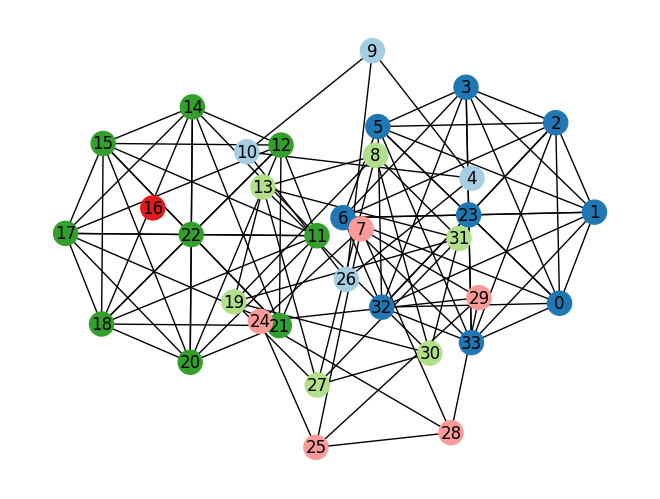

In [49]:
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
node_colors = [role_colors[node_roles[node]] for node in G_role.nodes]
plt.figure()

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw(
        G_role,
        pos=nx.kamada_kawai_layout(G_role),
        with_labels=True,
        node_color=node_colors,
    )

plt.show()

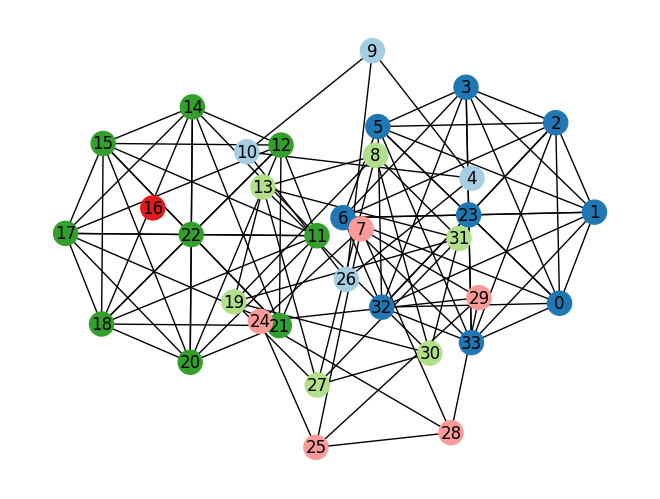